In [3]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class PreInputBlock(nn.Module):

    def __init__(self, outchannel, stride=1):
        super(PreInputBlock, self).__init__()
        self.pre = nn.ModuleList([
         nn.Sequential(nn.Conv2d(3, outchannel, 1, stride, bias=False), nn.BatchNorm2d(outchannel))])

    def forward(self, x):
        out = x
        for model in self.pre:
            out = model(out)
        else:
            return out


class skipresnet18_2(nn.Module):
    
    def __init__(self, num_classes=12):
        super(skipresnet18_2, self).__init__()
        self.k = 1
        self.conv1 = nn.Conv2d(3, 64, 3, stride=2, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.mish = nn.Mish()

        
        self.layer1 = nn.Sequential(nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(64),nn.ReLU(inplace=True))
        self.layer2 = nn.Sequential(nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(64))
        self.layer3 = nn.Sequential(nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(64),nn.ReLU(inplace=True))
        self.layer4 = nn.Sequential(nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(64))
        
        self.layer5 = nn.Sequential(nn.Conv2d(64, 128, 3, stride=2, padding=1, bias=False), nn.BatchNorm2d(128),nn.ReLU(inplace=True))
        self.layer6 = nn.Sequential(nn.Conv2d(128, 128, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(128))
        self.layer7 = nn.Sequential(nn.Conv2d(128, 128, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(128),nn.ReLU(inplace=True))
        self.layer8 = nn.Sequential(nn.Conv2d(128, 128, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(128))
        

        self.layer9 = nn.Sequential(nn.Conv2d(128, 256, 3, stride=2, padding=1, bias=False), nn.BatchNorm2d(256),nn.ReLU(inplace=True))
        self.layer10 = nn.Sequential(nn.Conv2d(256, 256, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(256))
        self.layer11 = nn.Sequential(nn.Conv2d(256, 256, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(256),nn.ReLU(inplace=True))
        self.layer12 = nn.Sequential(nn.Conv2d(256, 256, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(256))

        self.layer13 = nn.Sequential(nn.Conv2d(256, 512, 3, stride=2, padding=1, bias=False), nn.BatchNorm2d(512),nn.ReLU(inplace=True))
        self.layer14 = nn.Sequential(nn.Conv2d(512, 512, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(512))
        self.layer15 = nn.Sequential(nn.Conv2d(512, 512, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(512),nn.ReLU(inplace=True))
        self.layer16 = nn.Sequential(nn.Conv2d(512, 512, 3, stride=1, padding=1, bias=False), nn.BatchNorm2d(512))

        self.downsample1 = nn.Sequential(nn.Conv2d(64, 128, kernel_size=1, stride=2, bias=False), nn.BatchNorm2d(128))
        self.downsample2 = nn.Sequential(nn.Conv2d(128, 256, kernel_size=1, stride=2, bias=False), nn.BatchNorm2d(256))
        self.downsample3 = nn.Sequential(nn.Conv2d(256, 512, kernel_size=1, stride=2, bias=False), nn.BatchNorm2d(512))

        self.pre1 = nn.Sequential(nn.Conv2d(3, 64, 1, stride=4, bias=False), nn.BatchNorm2d(64))
        self.pre2 = nn.Sequential(nn.Conv2d(3, 64, 1, stride=4, bias=False), nn.BatchNorm2d(64))
        
        self.pre3 = nn.Sequential(nn.Conv2d(3, 128, 1, stride=8, bias=False), nn.BatchNorm2d(128))      
        self.pre4 = nn.Sequential(nn.Conv2d(3, 128, 1, stride=8, bias=False), nn.BatchNorm2d(128))

        self.pre5 = nn.Sequential(nn.Conv2d(3, 256, 1, stride=16, bias=False), nn.BatchNorm2d(256))   
        self.pre6 = nn.Sequential(nn.Conv2d(3, 256, 1, stride=16, bias=False), nn.BatchNorm2d(256))

        self.pre7 = nn.Sequential(nn.Conv2d(3, 512, 1, stride=32, bias=False), nn.BatchNorm2d(512))  
        self.pre8 = nn.Sequential(nn.Conv2d(3, 512, 1, stride=32, bias=False), nn.BatchNorm2d(512))

        self.avg = nn.AvgPool2d(4, stride=1)

        self.fc = nn.Linear(512, num_classes)

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.bn1(x1)
        x1 = self.relu(x1)
        x1 = self.maxpool(x1)
            
        x2 = self.layer1(x1)
        x3 = self.layer2(x2)
        if self.k == 2:
            pre_x1 = self.pre1(x0)
            x3 = pre_x1 + x3 
        else:
            x3 = x1 + x3
        x3 = self.relu(x3)
            
        x4 = self.layer3(x3)
        x5 = self.layer4(x4)
        if self.k == 3:
            pre_x2 = self.pre2(x0)
            x5 = pre_x2 + x5
        else:
            x5 = x3 + x5
        x5 = self.relu(x5)
            
        x50 = self.downsample1(x5)
        x6 = self.layer5(x5)
        x7 = self.layer6(x6)
        if self.k == 4:
            pre_x3 = self.pre3(x0)
            x7 = pre_x3 + x7 
        else:
            x7 = x50 + x7
        x7 = self.relu(x7)
            
        x8 = self.layer7(x7)
        x9 = self.layer8(x8)
        if self.k == 5:
            pre_x4 = self.pre4(x0)
            x9 = pre_x4 + x9 
        else:
            x9 = x7 + x9
        x9 = self.relu(x9)
            
        x90 = self.downsample2(x9)
        x10 = self.layer9(x9)
        x11 = self.layer10(x10)
        if self.k == 6:
            pre_x5 = self.pre5(x0)
            x11 = pre_x5 + x11 
        else:
            x11 = x90 + x11
        x11 = self.relu(x11)
            
        x12 = self.layer11(x11)
        x13 = self.layer12(x12)
        if self.k == 7:
            pre_x6 = self.pre6(x0)
            x13 = pre_x6 + x13 
        else:
            x13 = x11 + x13
        x13 = self.relu(x13)
            
        x130 = self.downsample3(x13)
        x14 = self.layer13(x13)
        x15 = self.layer14(x14)
        if self.k == 8:
            pre_x7 = self.pre7(x0)
            x15 = pre_x7 + x15
        else:
            x15 = x130 + x15
        x15 = self.relu(x15)
            
        x16 = self.layer15(x15)
        x17 = self.layer16(x16)
        if self.k == 9:
            pre_x8 = self.pre8(x0)
            x17 = pre_x8 + x17 
        else:
            x17 = x15 + x17
        x17 = self.relu(x17)

        out = self.avg(x17)
        out = out.view(out.size(0),-1)
        out = self.fc(out)
        return out 


    def GetK(self, k):
        self.k = k


#if __name__ == '__main__':
#model = skipresnet18_2()
#print(model)
#model = model.to('cuda')
#summary(model, input_size=(3, 128, 128), batch_size=-1, device='cuda')
    #print(model)
    #print(len(model.total_pre_layers))
    #print(len(model.total_layers))
#print(f"Total number of parameters: {sum(p.numel() for p in model.parameters())}")#

In [2]:


from numpy import log2
import torch
import torch.nn.functional as F
from torch.nn.modules import flatten
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.pooling import MaxPool2d
import torchvision
from torch.utils.data import DataLoader, dataloader, Subset
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import time
import numpy as np
from torchvision import transforms
from matplotlib import pyplot as plt
from tqdm import tqdm
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from sklearn.model_selection import KFold
#import torch.optim.lr_scheduler as lr_scheduler
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"






# from resnet_skip import ResNet_Skip

# torch.manual_seed(1)

# 图像预处理
transform_train = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(),  # 图像一半的概率翻转，一半的概率不翻转
    #transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    #transforms.ColorJitter(contrast=10),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # R,G,B每层的归一化用到的均值和方差
])

transform_valid = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

BATCH_SIZE = 64



# 训练数据集
train_dataset = ImageFolder(root='../input/newdata3/train/', transform=transform_train)  
#validset = ImageFolder(root='../input/corn/train/', train=False, transform=transform_valid )

num_train = int(len(train_dataset))
#num_val = len(fullset)-num_train

#train_dataset, val_dataset = random_split(fullset, [num_train,num_val])

# 定义K-fold对象
Kf_train = KFold(n_splits=5, shuffle=True, random_state=42)

 # 生成一个个batch进行批训练，组成batch的时候顺序打乱取，
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True,num_workers=0) 

# 测试训练集

#validloader = torch.utils.data.DataLoader(validset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

#train_dataset = torchvision.datasets.MNIST(root="/home/featurize/work/data",train=True,transform=transform_train,download=True)
#test_dataset = torchvision.datasets.MNIST(root="/home/featurize/work/data",train=False,transform=transform_test,download=True)

# 添加tensorboard画图可视化
writer = SummaryWriter("../skipresnet18/logs_train_kfold")

#数据集长度
#train_data_size = num_train
#valid_data_size = num_val
#print("训练集长度：{}".format(train_data_size))
#print("测试集长度：{}".format(valid_data_size))



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#创建网络模型
# test_net = skip_net_mnist()
# test_net = SkipNetC2()
model = skipresnet18_2().to(device)
# if torch.cuda.device_count() > 1:
#   print("Let's use", torch.cuda.device_count(), "GPUs!")
#   test_net = nn.DataParallel(test_net)

# ../input/skipnetmodel/skip_net_CIFAR10_164 (3)
# test_net.load_state_dict(torch.load("(1)—3k_nopre_mish_Skipnet18_0_50_128_0.01.pkl"))


#创建损失函数（交叉熵损失函数）
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn.to(device)
#创建优化器
#learning_rata = 0.001
LR = 0.001#或者使用1e-2代替0.01
optimizer = torch.optim.SGD(model.parameters(),lr=LR, momentum=0.9, weight_decay=5e-4)
# 定义学习率调度器
#scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

# 获取网络参数
def GetParametaer(net):
    # Get parameters of the net
    list = []
    for __, parameter in net.named_parameters():
        list.append(parameter)
    
    return list
  
def GetNum(NumOfLayers,x):

    model.GetK(NumOfLayers)
    x = model(x)
    return x
#bitch_size    
# 从不同路径进入后可以得到每一层的输出
def Get_layers_OutNums(x):
    list_3 = []
    for i in range(1,10):
        temp = x
        temp = GetNum(i,temp)
        temp = F.softmax(temp,dim=1)
        list_3.append(temp)
    return list_3



# 获得损失值最小的那条路径
def LossOfEveryLayers(x, y,LossFunc):
    #Get the loss ofc every linaer layer
    loss_of_layer = []
    for i in range(9):
        # LossFunc：交叉熵，x是图片的预测输出，y是标签值
        loss_of_layer.append(LossFunc(x[i],y))


    return loss_of_layer.index(min(loss_of_layer))+1

    


def OutPut(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)

    temp2 = torch.max(layers_out_,2)[0].argmax(0)

    temp3 = torch.arange(0,len(temp2))
    
    output_  = layers_out_[temp2,temp3].to(device)
    
    return output_

def returnk(layers_out):
    # a=[[1,2,3],[11,22,33]](2*3)   b=[[4,5,6],[44,55,66]](2*3)
    # dim=0,stack(a,b)--->(0....)=1  2  3
    #                             11 22 33
    #                     (1....)=4  5  6
    #                             44 55 66
    layers_out_ = torch.stack(layers_out,0).to(device)
    temp = torch.max(layers_out_,2)[0].argmax(0)
    temp2 = temp.tolist()
    k = max(temp2,key=temp2.count)+1
    return k


plt.figure()

#训练的次数
total_train_step = 0
#测试次数
total_test_step = 0
total_train_accuracy = 0
# Decey_x = 0.5
total_train_accuracy_list = []
total_train_loss_list = []
total_test_accuracy_list = []
total_test_loss_list = []
val_accuracies = []
change_k = 0
best_acc = 0
#print("加载模型...")
#with open("../skipresnet18/epoch_corn/skipresnet18(relu)_50.pth",'rb') as f:
#    model.load_state_dict(torch.load(f))
#print("加载完毕!")

for train_index, val_index in Kf_train.split(range(num_train)):
    train_kfold_subset = Subset(train_dataset, train_index)
    val_kfold_subset =Subset(train_dataset, val_index)

    trainloader = DataLoader(train_kfold_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
    validloader = DataLoader(val_kfold_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
   
    for i in range(0, 30):
    
        print("第{}轮训练开始".format(i+1))
        total_train_loss = 0
        total_accuracy1 = 0
        total_accuracy2 = 0
        total_accuracy3 = 0

        model.train()
        for data in tqdm(trainloader):

            imgs, labels = data
            imgs = imgs.to(device)
        #imgs = imgs.view(-1,1,28,28)
            imgs = imgs.view(-1,3,128,128)
        # imgs = imgs.view(-1,3,32,32)                                  
            labels = labels.to(device)
#         layers_out = Get_layers_OutNums(imgs)
        
            if i<change_k:
                k = 1
                optimizer.zero_grad()
                model.GetK(k)
                output = model(imgs)
                loss = loss_fn(output, labels)
                loss.backward()
                optimizer.step()
            #scheduler.step(loss)
                total_train_loss += loss.item()
                total_train_step = total_train_step + 1
                accuracy1 = (output.argmax(1)==labels).sum()
                total_accuracy1 += accuracy1
            
            else:
                layers_out = Get_layers_OutNums(imgs)
                optimizer.zero_grad()
    
      
            # 1.最小损失值路径选择算法
                k_1 = LossOfEveryLayers(layers_out,labels,loss_fn)
    #         print("训练",k_1)
            # 选择损失值最小的输入路径
                model.GetK(k_1)
    #         print(test_net.k)
                outputs1 = model(imgs)
                loss1 = loss_fn(outputs1,labels)


           # 3.最优路径统计算法 
                k3 = returnk(layers_out) 
    #         print("训练",k3)
                model.GetK(k3)
                outputs3 = model(imgs)
    #         print(test_net.k)
                loss3 = loss_fn(outputs3,labels)                                                                                                                                                                                                                                      
    #         loss = loss3

             #2.个体最优路径选择算法
                outputs2 = OutPut(layers_out)
                loss2 = loss_fn(outputs2,labels)
            
                loss = loss1+loss2+loss3
    #         loss = loss2+loss3

            
                loss.backward()
                optimizer.step()
            #scheduler.step(loss)

                total_train_loss += loss.item()
                total_train_step = total_train_step + 1
    
    #             print("训练次数:{}，loss3: {}".format(total_train_step,loss3.item()))
    #             print("训练次数:{}，loss2: {}，loss3: {}".format(total_train_step,loss2.item(),loss3.item()))
    #             print("训练次数:{}，loss1: {}，loss2: {}".format(total_train_step,loss1.item(),loss2.item()))
    
                accuracy1 = (outputs1.argmax(1)==labels).sum()
                accuracy2 = (outputs2.argmax(1)==labels).sum()
                accuracy3 = (outputs3.argmax(1)==labels).sum()
                total_accuracy1 += accuracy1
                total_accuracy2 += accuracy2
                total_accuracy3 += accuracy3
        #print("训练次数:{}，loss1: {}，loss2: {}，loss3: {}".format(total_train_step,loss1.item(),loss2.item(),loss3.item()))
        if i<change_k:
            train_accurary1 = total_accuracy1/len(train_index)
            print(total_train_loss)
            print("66666在训练集上的正确率：{}".format(train_accurary1))
        else: 
            train_accurary1 = total_accuracy1/len(train_index) 
            train_accurary2 = total_accuracy2/len(train_index)
            train_accurary3 = total_accuracy3/len(train_index)       
            #print("在训练集上的loss：{}".format(total_train_loss))
            #print("在训练集上的正确率：{}".format(train_accurary1))
            #print("在训练集上的正确率（不用k）：{}".format(train_accurary2))
            print("在训练集上的正确率（使用计数k）：{}".format(train_accurary3))
        total_train_accuracy_list.append(train_accurary1)
        total_train_loss_list.append(total_train_loss)

        print("开始测试。。。")
        total_accuracy = 0
    #测试步骤
    #test_net.eval()
        total_test_loss = 0
        total_test_step = 0

    #model.eval()
        with torch.no_grad():
        #test_net.eval()
            for data in tqdm(validloader):
            #test_net.eval()
                imgs, labels = data
                imgs = imgs.to(device)
            #imgs = imgs.view(-1,1,28,28)                              
                imgs = imgs.view(-1,3,128,128)

                labels = labels.to(device)
                if i<change_k:
                    k=1
                    model.GetK(k)
                    output_s = model(imgs)
                else:
                    layers_out2 = Get_layers_OutNums(imgs)
            
                    k = returnk(layers_out2)
                    model.GetK(k)
                    output_s = model(imgs)

                loss = loss_fn(output_s,labels)
                total_test_loss = total_test_loss + loss.item()
                total_test_step = total_test_step + 1
            #if total_test_step%40 == 0:
            #   print("训练次数{}，loss{}".format(total_test_step,loss.item()))
                accuracy = (output_s.argmax(1)==labels).sum()
                total_accuracy += accuracy 
            test_accurary = total_accuracy/len(val_index)
            print("在测试集上的正确率：{}".format(test_accurary))
            #print("在测试集上的loss：{}".format(total_test_loss)) 
        # 将每次测试结果实时写入acc.txt文件中
            print('Saving model......')
            torch.save(model.state_dict(), f'../skipresnet18/epoch_kfold/skipresnet18_10{i + 1}.pth')
            writer.add_scalar("test_loss", total_test_loss, total_test_step) 
            total_test_accuracy_list.append(test_accurary)
            total_test_loss_list.append(total_test_loss)
#     time_end=time.time()
#     print('totally cost',time_end-time_start)
            if test_accurary > best_acc:
                f3 = open("../skipresnet18/acc(5fold).txt", "w")
                f3.write(f"训练轮次为{i + 1}时,准确率最高!准确率为{test_accurary}")
                f3.close()
                best_acc = test_accurary

        val_accuracies.append(best_acc)
    print("训练结束。。。")

average_val_accuracy = sum(val_accuracies) / len(val_accuracies)

print(f"Average Validation Accuracy: {average_val_accuracy:.4f}")




for i in range(len(total_test_accuracy_list)):
    with open('../skipresnet18/skipresnet18_acc(5fold).txt', 'a') as f:
        f.write('%d %.5f %.5f %.5f %.5f\n' % (i+1,total_train_accuracy_list[i],total_train_loss_list[i],total_test_accuracy_list[i],total_test_loss_list[i]))
#     with open('skip18_train_accura/te_records_k.txt', 'a') as f:
#         f.write('%d %.3f\n' % (i+1,total_train_accuracy_list[i]))
torch.save(model.state_dict(),"../skipresnet18/skipresnet18(5kfold).pkl")


        


  0%|          | 0/63 [00:00<?, ?it/s]

cuda
第1轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.34068137407302856
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.5805805921554565
Saving model......
第2轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.6452906131744385
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.7077077031135559
Saving model......
第3轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.7404809594154358
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.739739716053009
Saving model......
第4轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.7923346757888794
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.7857857942581177
Saving model......
第5轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.82890784740448
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.8248248100280762
Saving model......
第6轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.8491984009742737
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.8068068027496338
Saving model......
第7轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.859468936920166
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.8548548221588135
Saving model......
第8轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.8880260586738586
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.8428428173065186
Saving model......
第9轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.905811607837677
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.8448448181152344
Saving model......
第10轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.9025551080703735
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.8678678274154663
Saving model......
第11轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.915080189704895
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.8458458185195923
Saving model......
第12轮训练开始


  0%|          | 0/16 [00:00<?, ?it/s]

在训练集上的正确率（使用计数k）：0.9200901985168457
开始测试。。。


  0%|          | 0/63 [00:00<?, ?it/s]

在测试集上的正确率：0.8878878951072693
Saving model......
第13轮训练开始


 48%|████▊     | 30/63 [00:34<00:37,  1.14s/it]


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [59]:
print(f"Average Validation Accuracy: {average_val_accuracy:.4f}")

Average Validation Accuracy: 0.9705


seed is 121
测试集长度：548
cuda


100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


score_array: (548, 12)
label_onehot: (548, 12)
(549,) (549,) 0.7622647901631819
(549,) (549,) 0.9967675013267719
(549,) (549,) 0.9557742493520723
(549,) (549,) 0.9755033365837791
(549,) (549,) 0.9121512195750587
(549,) (549,) 0.9982250910705668
(549,) (549,) 0.9484122547407512
(549,) (549,) 1.0000000000000002
(549,) (549,) 0.9970361910923037
(549,) (549,) 0.9949245541838132
(549,) (549,) 0.9866661205070791
(549,) (549,) 0.9852458547757746
Average precision score, micro-averaged over all classes: 0.9750
Accuracy of Black-grass : 66.667 %
Accuracy of Charlock : 97.778 %
Accuracy of Cleavers : 93.939 %
Accuracy of Common Chickweed : 97.183 %
Accuracy of Common wheat : 96.000 %
Accuracy of Fat Hen : 100.000 %
Accuracy of Loose Silky-bent : 92.105 %
Accuracy of Maize : 100.000 %
Accuracy of Scentless Mayweed : 100.000 %
Accuracy of Shepherd Purse : 96.296 %
Accuracy of Small-flowered Cranesbill : 96.491 %
Accuracy of Sugar beet : 95.652 %
[[20  0  0  0  2  0  8  0  0  0  0  0]
 [ 0 44  0  0

<Figure size 640x480 with 0 Axes>

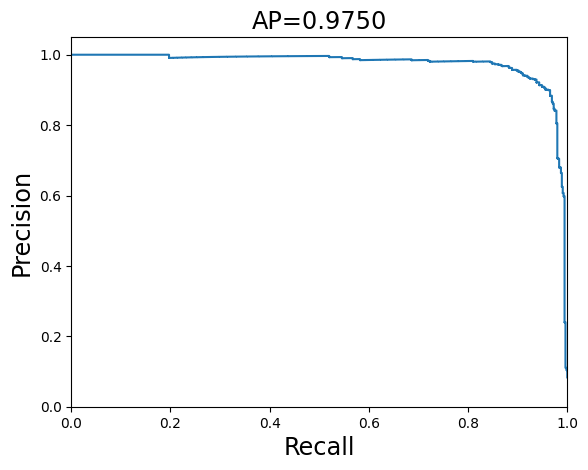

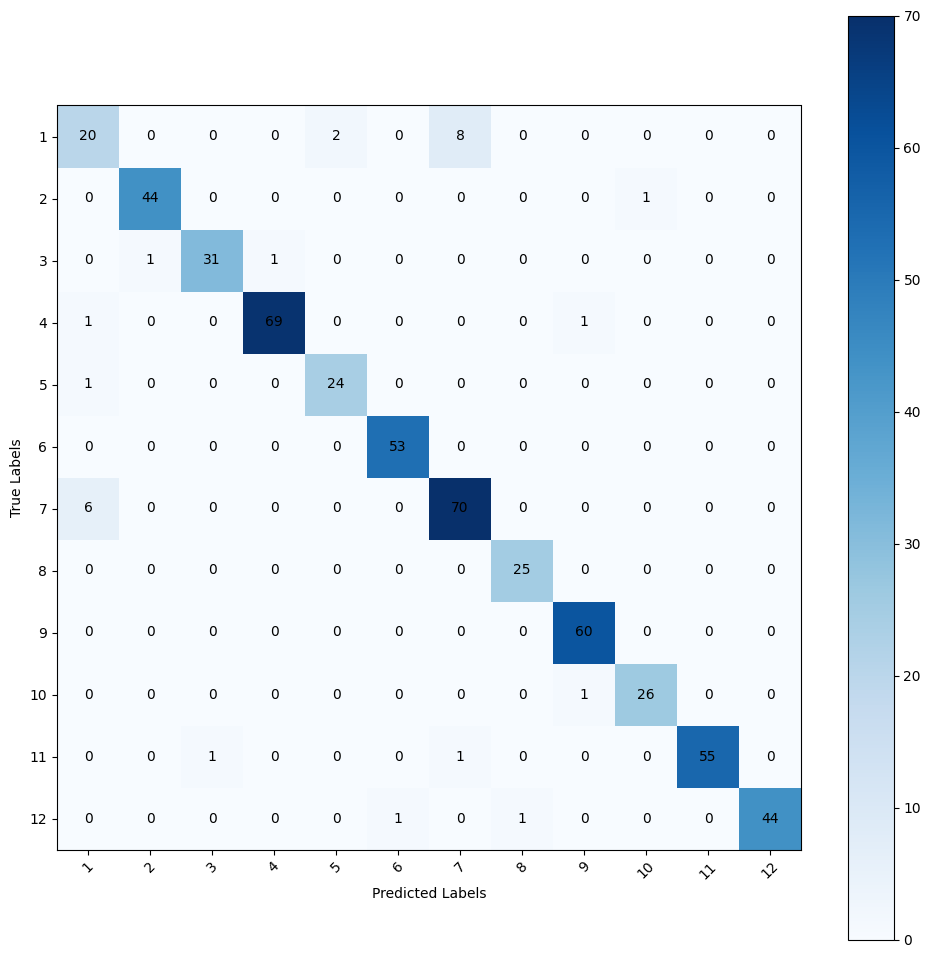

In [4]:
# 使用cifar10数据集，跳跃网络

from numpy import log2
import torch
import torch.nn.functional as F
from torch.nn.modules import flatten
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.pooling import MaxPool2d
import torchvision
from torch.utils.data import DataLoader, dataloader
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import time
import numpy as np
from torchvision import transforms
from torchvision.datasets import ImageFolder
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import os
import random
from sklearn.metrics import roc_curve, auc, f1_score,precision_recall_curve,average_precision_score
# import seaborn as sns
# from resnet_skip import ResNet_Skip

# torch.manual_seed(1)
#transform_train = transforms.Compose([
 #   transforms.Resize(size=(128,128)),
    #transforms.RandomCrop(32, padding=4),  # 先四周填充0，在吧图像随机裁剪成32*32
    #transforms.RandomHorizontalFlip(),  # 图像一半的概率翻转，一半的概率不翻转
    
#    transforms.ToTensor(),
#    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # R,G,B每层的归一化用到的均值和方差
#])

transform_test = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# 训练数据集
#trainset = ImageFolder(root='../input/corn/train', transform=transform_train)  
 # 生成一个个batch进行批训练，组成batch的时候顺序打乱取，
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True,num_workers=0) 

# 测试训练集
testset = ImageFolder(root='../input/newdata3/test/', transform=transform_test )
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True, num_workers=0)

#train_dataset = torchvision.datasets.CIFAR10(root="/home/featurize/work/data",train=True,transform=transform_train,download=True)
#test_dataset = torchvision.datasets.CIFAR10(root="/home/featurize/work/data",train=False,transform=transform_test,download=True)
seed_n = 121
print('seed is ' + str(seed_n))
g = torch.Generator()
g.manual_seed(seed_n)
random.seed(seed_n)
np.random.seed(seed_n)
torch.manual_seed(seed_n)
torch.cuda.manual_seed(seed_n)
torch.cuda.manual_seed_all(seed_n)
            # torch.backends.cudnn.deterministic=True
            # torch.backends.cudnn.benchmark = False
            # torch.backends.cudnn.enabled = False
            # torch.use_deterministic_algorithms(True)
            # os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':16:8'
os.environ['PYTHONHASHSEED'] = str(seed_n)  # 为了禁止hash随机化，使得实验可复现。


#数据集长度
#train_data_size = len(trainset)
test_data_size = len(testset)
#print("训练集长度：{}".format(train_data_size))
print("测试集长度：{}".format(test_data_size))



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#创建网络模型
# test_net = skip_net_mnist()
# test_net = SkipNetC2()
test_net = skipresnet18_2()
# if torch.cuda.device_count() > 1:
#   print("Let's use", torch.cuda.device_count(), "GPUs!")
#   test_net = nn.DataParallel(test_net)

# ../input/skipnetmodel/skip_net_CIFAR10_164 (3)
#test_net.load_state_dict(torch.load("/home/featurize/work/(1)—3k_nopre_mish_Skipnet18_0_50_128_0.01.pkl"))
test_net.load_state_dict(torch.load("../skipresnet18/skipresnet18(5kfold).pkl"))
#test_net.load_state_dict(torch.load("../skipresnet18/skipresnet18_2_accuracy_none.pkl"))


test_net.to(device)
#创建损失函数
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn.to(device)
#创建优化器
learning_rata = 0.001
#learning_rata = 0.01#或者使用1e-2代替0.01
optimizer = torch.optim.SGD(test_net.parameters(),lr=learning_rata,momentum=0.9, weight_decay=5e-4)
num_classes = 12
# 存储预测得分
score_list = []
# 存储真实标签
label_list = []


def GetParametaer(net):
    # Get parameters of the net
    list = []
    for __, parameter in net.named_parameters():
        list.append(parameter)
    
    return list
  
def GetNum(NumOfLayers,x):

    test_net.GetK(NumOfLayers)
    x = test_net(x)
    return x
#bitch_size    
#可以得到每一层的输出
def Get_layers_OutNums(x):
    list_3 = []
    for i in range(1,10):
        temp = x
        temp = GetNum(i,temp)
        temp = F.softmax(temp,dim=1)
        list_3.append(temp)
    return list_3




def LossOfEveryLayers(x, y,LossFunc):
    #Get the loss ofc every linaer layer
    loss_of_layer = []
    for i in range(9):
        loss_of_layer.append(LossFunc(x[i],y))


    return loss_of_layer.index(min(loss_of_layer))+1

    


def OutPut(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)

    temp2 = torch.max(layers_out_,2)[0].argmax(0)

    temp3 = torch.arange(0,len(temp2))
    
    output_  = layers_out_[temp2,temp3].to(device)
    
    return output_

def returnk(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)
    temp = torch.max(layers_out_,2)[0].argmax(0)
    temp2 = temp.tolist()
    k = max(temp2,key=temp2.count)+1
    return k


plt.figure()

#训练的次数
total_train_step = 0
#测试次数
total_test_step = 0
total_train_accuracy = 0
# Decey_x = 0.5
total_train_accuracy_list = []
total_test_accuracy_list = []
change_k = 0


total_accuracy = 0
    #测试步骤
    # test_net.eval()
total_test_loss = 0
total_test_step = 0
# 测试模型
correct = [0] * 12
total = [0] * 12
y_pred = []
y_true = []
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        images = images.to(device)
        # images = images.view(-1,3,32,32)
        labels = labels.to(device)
        layers_out2 = Get_layers_OutNums(images)
            
        k = returnk(layers_out2)
        test_net.GetK(k)
        outputs = test_net(images)
        score_temp = outputs
        score_list.extend(score_temp.detach().cpu().numpy())
        label_list.extend(labels.cpu().numpy())


        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(labels.tolist())
        for i in range(len(labels)):
            label = labels[i]
            total[label] += 1
            if predicted[i] == label:
                correct[label] += 1
    score_array = np.array(score_list)
    # 将label转换为onehot形式
    label_tensor = torch.tensor(label_list)
    label_tensor = label_tensor.reshape((label_tensor.shape[0],1))
    label_onehot = torch.zeros(label_tensor.shape[0], num_classes)
    label_onehot.scatter_(dim=1, index=label_tensor, value=1)
    label_onehot = np.array(label_onehot)
    print("score_array:", score_array.shape)
    print("label_onehot:", label_onehot.shape)

    #调用sklearn库，计算每个类别对应的precision和recall
    precision_dict = dict()
    recall_dict = dict()
    average_precision_dict = dict()
    for i in range(num_classes):
        precision_dict[i], recall_dict[i], _ = precision_recall_curve(label_onehot[:, i], score_array[:, i])
        average_precision_dict[i] = average_precision_score(label_onehot[:, i], score_array[:, i])
        print(precision_dict[i].shape, recall_dict[i].shape, average_precision_dict[i])

    # micro
    precision_dict["micro"], recall_dict["micro"], _ = precision_recall_curve(label_onehot.ravel(),
                                                                              score_array.ravel())
    average_precision_dict["micro"] = average_precision_score(label_onehot, score_array, average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.4f}'.format(average_precision_dict["micro"]))
 
    # 绘制所有类别平均的pr曲线
    plt.figure()
    plt.step(recall_dict['micro'], precision_dict['micro'], where='post')
 
    plt.xlabel('Recall',fontsize='xx-large')
    plt.ylabel('Precision',fontsize='xx-large')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'AP={0:0.4f}'
        .format(average_precision_dict["micro"]),fontsize='xx-large')
    plt.savefig("../skipresnet18/set12_pr_curve1.jpg")

# 输出每个类别的准确率
for i in range(12):
    print('Accuracy of %5s : %.3f %%' % (
        testset.classes[i], 100 * correct[i] / total[i]))


# 将预测结果转换为标签
y_pred_labels = np.array(y_pred)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred_labels)

print(cm)


# 绘制混淆矩阵
# plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.4)
# sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()
# 绘制混淆矩阵
plt.figure(figsize=(12, 12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# 添加数值
for i in range(12):
    for j in range(12):
        plt.annotate(str(cm[i][j]), xy=(j, i), horizontalalignment='center', verticalalignment='center')

plt.colorbar()
tick_marks = np.arange(12)
plt.xticks(tick_marks, ['1', '2', '3', '4','5','6', '7', '8', '9','10', '11','12'], rotation=45)
plt.yticks(tick_marks, ['1', '2', '3', '4','5','6', '7', '8', '9','10', '11','12'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.show()
plt.savefig('../skipresnet18/confusion_matrixA_5kfold1.png')
        


In [5]:
from sklearn.metrics import classification_report

# 计算准确率、召回率、精确率和 F1 值
target_names = ['1', '2', '3', '4','5','6', '7', '8', '9','10', '11','12']
print(classification_report(y_true, y_pred_labels, target_names=target_names,digits=5))

              precision    recall  f1-score   support

           1    0.71429   0.66667   0.68966        30
           2    0.97778   0.97778   0.97778        45
           3    0.96875   0.93939   0.95385        33
           4    0.98571   0.97183   0.97872        71
           5    0.92308   0.96000   0.94118        25
           6    0.98148   1.00000   0.99065        53
           7    0.88608   0.92105   0.90323        76
           8    0.96154   1.00000   0.98039        25
           9    0.96774   1.00000   0.98361        60
          10    0.96296   0.96296   0.96296        27
          11    1.00000   0.96491   0.98214        57
          12    1.00000   0.95652   0.97778        46

    accuracy                        0.95073       548
   macro avg    0.94412   0.94343   0.94350       548
weighted avg    0.95059   0.95073   0.95040       548



In [3]:

from numpy import log2
import torch
import torch.nn.functional as F
from torch.nn.modules import flatten
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.pooling import MaxPool2d
import torchvision
from torch.utils.data import DataLoader, dataloader
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import time
import numpy as np
from torchvision import transforms
from matplotlib import pyplot as plt
from tqdm import tqdm
from torchvision.datasets import ImageFolder
#import torch.optim.lr_scheduler as lr_scheduler
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"








# from resnet_skip import ResNet_Skip

# torch.manual_seed(1)

# 图像预处理
transform_train = transforms.Compose([
    transforms.Resize(size=(128,128)),
    #transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(),  # 图像一半的概率翻转，一半的概率不翻转
    #transforms.RandomVerticalFlip(),
    #transforms.RandomRotation(15),
    #transforms.ColorJitter(contrast=10),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # R,G,B每层的归一化用到的均值和方差
])

transform_valid = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

BATCH_SIZE = 64

# 训练数据集
trainset = ImageFolder(root='../input/newdata2/train', transform=transform_train)  
 # 生成一个个batch进行批训练，组成batch的时候顺序打乱取，
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True,num_workers=0) 

# 测试训练集
validset = ImageFolder(root='../input/newdata2/val/', transform=transform_valid )
validloader = torch.utils.data.DataLoader(validset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

#train_dataset = torchvision.datasets.MNIST(root="/home/featurize/work/data",train=True,transform=transform_train,download=True)
#test_dataset = torchvision.datasets.MNIST(root="/home/featurize/work/data",train=False,transform=transform_test,download=True)

# 添加tensorboard画图可视化
writer = SummaryWriter("../skipresnet18/logs_train_newdata2")

#数据集长度
train_data_size = len(trainset)
valid_data_size = len(validset)
print("训练集长度：{}".format(train_data_size))
print("测试集长度：{}".format(valid_data_size))



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#创建网络模型

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
model = skipresnet18_2().to(device)


#创建损失函数（交叉熵损失函数）
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn.to(device)
#创建优化器
#learning_rata = 0.001
LR = 0.0001#或者使用1e-2代替0.01
optimizer = torch.optim.SGD(model.parameters(),lr=LR, momentum=0.9, weight_decay=5e-4)
# 定义学习率调度器
#scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

# 获取网络参数
def GetParametaer(net):
    # Get parameters of the net
    list = []
    for __, parameter in net.named_parameters():
        list.append(parameter)
    
    return list
  
def GetNum(NumOfLayers,x):

    model.GetK(NumOfLayers)
    x = model(x)
    return x
#bitch_size    
# 从不同路径进入后可以得到每一层的输出
def Get_layers_OutNums(x):
    list_3 = []
    for i in range(1,10):
        temp = x
        temp = GetNum(i,temp)
        temp = F.softmax(temp,dim=1)
        list_3.append(temp)
    return list_3



# 获得损失值最小的那条路径
def LossOfEveryLayers(x, y,LossFunc):
    #Get the loss ofc every linaer layer
    loss_of_layer = []
    for i in range(9):
        # LossFunc：交叉熵，x是图片的预测输出，y是标签值
        loss_of_layer.append(LossFunc(x[i],y))


    return loss_of_layer.index(min(loss_of_layer))+1

    


def OutPut(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)

    temp2 = torch.max(layers_out_,2)[0].argmax(0)

    temp3 = torch.arange(0,len(temp2))
    
    output_  = layers_out_[temp2,temp3].to(device)
    
    return output_

def returnk(layers_out):
    # a=[[1,2,3],[11,22,33]](2*3)   b=[[4,5,6],[44,55,66]](2*3)
    # dim=0,stack(a,b)--->(0....)=1  2  3
    #                             11 22 33
    #                     (1....)=4  5  6
    #                             44 55 66
    layers_out_ = torch.stack(layers_out,0).to(device)
    temp = torch.max(layers_out_,2)[0].argmax(0)
    temp2 = temp.tolist()
    k = max(temp2,key=temp2.count)+1
    return k


plt.figure()

#训练的次数
total_train_step = 0
#测试次数
total_test_step = 0
total_train_accuracy = 0
# Decey_x = 0.5
total_train_accuracy_list = []
total_train_loss_list = []
total_test_accuracy_list = []
total_test_loss_list = []
change_k = 0
best_acc = 0
print("加载模型...")
with open("../skipresnet18/newdata2_epoch/skipresnet18_30.pth",'rb') as f:
    model.load_state_dict(torch.load(f))
print("加载完毕!")

for i in range(30, 50):
    
    print("第{}轮训练开始".format(i+1))
    total_train_loss = 0
    total_accuracy1 = 0
    total_accuracy2 = 0
    total_accuracy3 = 0

    model.train()
    for data in tqdm(trainloader):

        imgs, labels = data
        imgs = imgs.to(device)
        #imgs = imgs.view(-1,1,28,28)
        imgs = imgs.view(-1,3,128,128)
        # imgs = imgs.view(-1,3,32,32)                                  
        labels = labels.to(device)
#         layers_out = Get_layers_OutNums(imgs)
        
        if i<change_k:
            k = 1
            optimizer.zero_grad()
            model.GetK(k)
            output = model(imgs)
            loss = loss_fn(output, labels)
            loss.backward()
            optimizer.step()
            #scheduler.step(loss)
            total_train_loss += loss.item()
            total_train_step = total_train_step + 1
            accuracy1 = (output.argmax(1)==labels).sum()
            total_accuracy1 += accuracy1
            
        else:
            layers_out = Get_layers_OutNums(imgs)
            optimizer.zero_grad()
    
      
            # 1.最小损失值路径选择算法
            k_1 = LossOfEveryLayers(layers_out,labels,loss_fn)
    #         print("训练",k_1)
            # 选择损失值最小的输入路径
            model.GetK(k_1)
    #         print(test_net.k)
            outputs1 = model(imgs)
            loss1 = loss_fn(outputs1,labels)


           # 3.最优路径统计算法 
            k3 = returnk(layers_out) 
    #         print("训练",k3)
            model.GetK(k3)
            outputs3 = model(imgs)
    #         print(test_net.k)
            loss3 = loss_fn(outputs3,labels)                                                                                                                                                                                                                                      
    #         loss = loss3

             #2.个体最优路径选择算法
            outputs2 = OutPut(layers_out)
            loss2 = loss_fn(outputs2,labels)
            
            loss = loss1+loss2+loss3
    #         loss = loss2+loss3

            
            loss.backward()
            optimizer.step()
            #scheduler.step(loss)

            total_train_loss += loss.item()
            total_train_step = total_train_step + 1
    
    #             print("训练次数:{}，loss3: {}".format(total_train_step,loss3.item()))
    #             print("训练次数:{}，loss2: {}，loss3: {}".format(total_train_step,loss2.item(),loss3.item()))
    #             print("训练次数:{}，loss1: {}，loss2: {}".format(total_train_step,loss1.item(),loss2.item()))
    
            accuracy1 = (outputs1.argmax(1)==labels).sum()
            accuracy2 = (outputs2.argmax(1)==labels).sum()
            accuracy3 = (outputs3.argmax(1)==labels).sum()
            total_accuracy1 += accuracy1
            total_accuracy2 += accuracy2
            total_accuracy3 += accuracy3
        #print("训练次数:{}，loss1: {}，loss2: {}，loss3: {}".format(total_train_step,loss1.item(),loss2.item(),loss3.item()))
    if i<change_k:
        train_accurary1 = total_accuracy1/train_data_size
        print(total_train_loss)
        print("66666在训练集上的正确率：{}".format(train_accurary1))
    else: 
        train_accurary1 = total_accuracy1/train_data_size  
        train_accurary2 = total_accuracy2/train_data_size
        train_accurary3 = total_accuracy3/train_data_size       
        print("在训练集上的loss：{}".format(total_train_loss))
        print("在训练集上的正确率：{}".format(train_accurary1))
        print("在训练集上的正确率（不用k）：{}".format(train_accurary2))
        print("在训练集上的正确率（使用计数k）：{}".format(train_accurary3))
    total_train_accuracy_list.append(train_accurary1)
    total_train_loss_list.append(total_train_loss)

    print("开始测试。。。")
    total_accuracy = 0
    #测试步骤
    #test_net.eval()
    total_test_loss = 0
    total_test_step = 0

    #model.eval()
    with torch.no_grad():
        #test_net.eval()
        for data in tqdm(validloader):
            #test_net.eval()
            imgs, labels = data
            imgs = imgs.to(device)
            #imgs = imgs.view(-1,1,28,28)                              
            imgs = imgs.view(-1,3,128,128)

            labels = labels.to(device)
            if i<change_k:
                k=1
                model.GetK(k)
                output_s = model(imgs)
            else:
                layers_out2 = Get_layers_OutNums(imgs)
            
                k = returnk(layers_out2)
                model.GetK(k)
                output_s = model(imgs)

            loss = loss_fn(output_s,labels)
            total_test_loss = total_test_loss + loss.item()
            total_test_step = total_test_step + 1
            #if total_test_step%40 == 0:
            #   print("训练次数{}，loss{}".format(total_test_step,loss.item()))
            accuracy = (output_s.argmax(1)==labels).sum()
            total_accuracy += accuracy 
        test_accurary = total_accuracy/valid_data_size
        print("在测试集上的正确率：{}".format(test_accurary))
        print("在测试集上的loss：{}".format(total_test_loss)) 
        # 将每次测试结果实时写入acc.txt文件中
        print('Saving model......')
        torch.save(model.state_dict(), f'../skipresnet18/newdata2_epoch/skipresnet18_{i + 1}.pth')
        writer.add_scalar("test_loss", total_test_loss, total_test_step) 
        total_test_accuracy_list.append(test_accurary)
        total_test_loss_list.append(total_test_loss)
#     time_end=time.time()
#     print('totally cost',time_end-time_start)
        if test_accurary > best_acc:
            f3 = open("../skipresnet18/newdata2_bestacc.txt", "w")
            f3.write(f"训练轮次为{i + 1}时,准确率最高!准确率为{test_accurary}")
            f3.close()
            best_acc = test_accurary
print("训练结束。。。")




for i in range(len(total_test_accuracy_list)):
    with open('../skipresnet18/skipresnet18_newdata2_acc.txt', 'a') as f:
        f.write('%d %.5f %.5f %.5f %.5f\n' % (i+1,total_train_accuracy_list[i],total_train_loss_list[i],total_test_accuracy_list[i],total_test_loss_list[i]))
#     with open('skip18_train_accura/te_records_k.txt', 'a') as f:
#         f.write('%d %.3f\n' % (i+1,total_train_accuracy_list[i]))
torch.save(model.state_dict(),"../skipresnet18/skipresnet18_newdata2.pkl")


        


  0%|          | 0/53 [00:00<?, ?it/s]

训练集长度：3330
测试集长度：1108
cuda
加载模型...
加载完毕!
第31轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：101.29786348342896
在训练集上的正确率：0.995195209980011
在训练集上的正确率（不用k）：0.9168168306350708
在训练集上的正确率（使用计数k）：0.995195209980011
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8763538002967834
在测试集上的loss：8.052829250693321
Saving model......
第32轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：96.89232742786407
在训练集上的正确率：0.9957958459854126
在训练集上的正确率（不用k）：0.9189189672470093
在训练集上的正确率（使用计数k）：0.996096134185791
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8862816095352173
在测试集上的loss：8.25131967663765
Saving model......
第33轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：94.59537672996521
在训练集上的正确率：0.9978979229927063
在训练集上的正确率（不用k）：0.9291291236877441
在训练集上的正确率（使用计数k）：0.9972973465919495
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8754512667655945
在测试集上的loss：7.792100682854652
Saving model......
第34轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：91.81702208518982
在训练集上的正确率：0.9984984993934631
在训练集上的正确率（不用k）：0.9198198318481445
在训练集上的正确率（使用计数k）：0.9984984993934631
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8817689418792725
在测试集上的loss：7.874986827373505
Saving model......
第35轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：98.24675333499908
在训练集上的正确率：0.9981982111930847
在训练集上的正确率（不用k）：0.9276276230812073
在训练集上的正确率（使用计数k）：0.9978979229927063
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8781588673591614
在测试集上的loss：8.361896701157093
Saving model......
第36轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：94.19551396369934
在训练集上的正确率：0.9945946335792542
在训练集上的正确率（不用k）：0.908108115196228
在训练集上的正确率（使用计数k）：0.9945946335792542
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8682310581207275
在测试集上的loss：8.613212168216705
Saving model......
第37轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：92.28509902954102
在训练集上的正确率：0.9975976347923279
在训练集上的正确率（不用k）：0.9165165424346924
在训练集上的正确率（使用计数k）：0.9975976347923279
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8871840834617615
在测试集上的loss：7.474914953112602
Saving model......
第38轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：91.05621433258057
在训练集上的正确率：0.9990991353988647
在训练集上的正确率（不用k）：0.9261261224746704
在训练集上的正确率（使用计数k）：0.9990991353988647
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8808664083480835
在测试集上的loss：8.085372805595398
Saving model......
第39轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：94.15862488746643
在训练集上的正确率：0.9996997117996216
在训练集上的正确率（不用k）：0.9294294714927673
在训练集上的正确率（使用计数k）：0.9993994235992432
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8763538002967834
在测试集上的loss：7.984812393784523
Saving model......
第40轮训练开始


  0%|          | 0/18 [00:00<?, ?it/s]

在训练集上的loss：91.30495607852936
在训练集上的正确率：0.9975976347923279
在训练集上的正确率（不用k）：0.9225225448608398
在训练集上的正确率（使用计数k）：0.9975976347923279
开始测试。。。


  0%|          | 0/53 [00:00<?, ?it/s]

在测试集上的正确率：0.8709385991096497
在测试集上的loss：10.211335748434067
Saving model......
第41轮训练开始


  4%|▍         | 2/53 [00:09<03:49,  4.50s/it]


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

  0%|          | 0/5 [00:00<?, ?it/s]

训练集长度：4438
测试集长度：548
cuda


100%|██████████| 5/5 [00:15<00:00,  3.16s/it]


Accuracy of Black-grass : 86.667 %
Accuracy of Charlock : 95.556 %
Accuracy of Cleavers : 84.848 %
Accuracy of Common Chickweed : 94.366 %
Accuracy of Common wheat : 88.000 %
Accuracy of Fat Hen : 98.113 %
Accuracy of Loose Silky-bent : 93.421 %
Accuracy of Maize : 92.000 %
Accuracy of Scentless Mayweed : 98.333 %
Accuracy of Shepherd Purse : 96.296 %
Accuracy of Small-flowered Cranesbill : 96.491 %
Accuracy of Sugar beet : 95.652 %
[[26  0  0  0  0  0  4  0  0  0  0  0]
 [ 0 43  1  0  0  1  0  0  0  0  0  0]
 [ 0  1 28  1  0  1  0  0  1  0  1  0]
 [ 0  0  0 67  0  0  0  0  1  1  1  1]
 [ 2  0  0  0 22  0  0  0  0  0  0  1]
 [ 0  0  0  0  1 52  0  0  0  0  0  0]
 [ 5  0  0  0  0  0 71  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  2]
 [ 0  0  0  0  0  0  1  0 59  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 26  0  0]
 [ 0  1  0  0  0  0  1  0  0  0 55  0]
 [ 0  1  0  0  0  1  0  0  0  0  0 44]]


<Figure size 640x480 with 0 Axes>

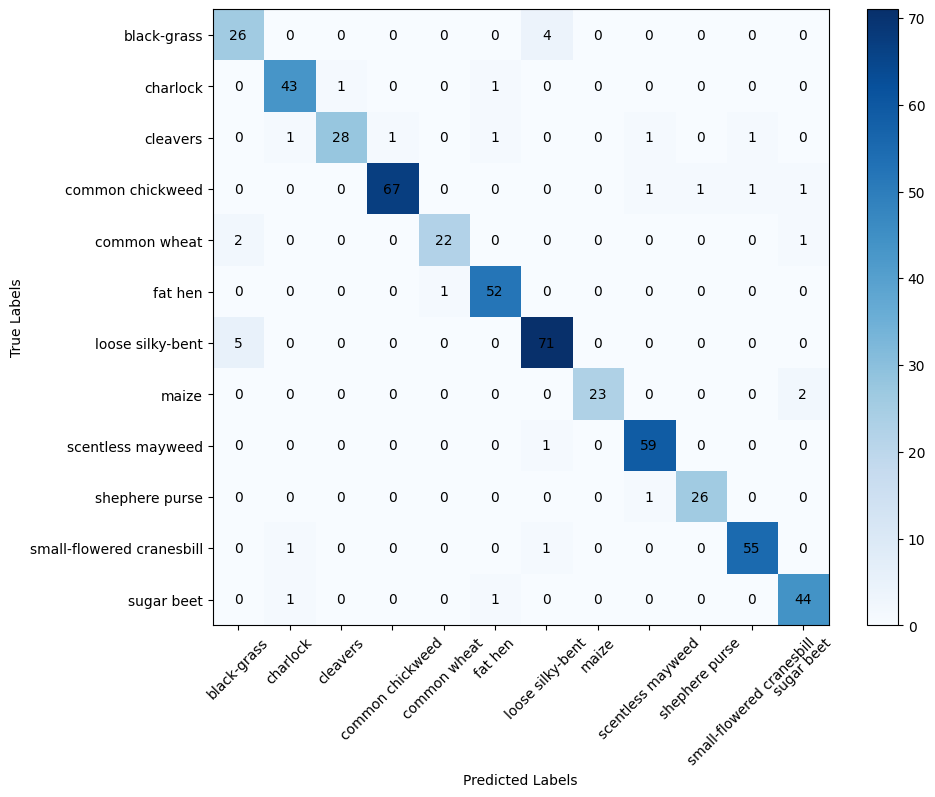

In [5]:
# 使用cifar10数据集，跳跃网络

from numpy import log2
import torch
import torch.nn.functional as F
from torch.nn.modules import flatten
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.pooling import MaxPool2d
import torchvision
from torch.utils.data import DataLoader, dataloader
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import time
import numpy as np
from torchvision import transforms
from torchvision.datasets import ImageFolder
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
# import seaborn as sns
# from resnet_skip import ResNet_Skip

# torch.manual_seed(1)
transform_train = transforms.Compose([
    transforms.Resize(size=(128,128)),
    #transforms.RandomCrop(32, padding=4),  # 先四周填充0，在吧图像随机裁剪成32*32
    #transforms.RandomHorizontalFlip(),  # 图像一半的概率翻转，一半的概率不翻转
    
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # R,G,B每层的归一化用到的均值和方差
])

transform_test = transforms.Compose([
    transforms.Resize(size=(128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# 训练数据集
trainset = ImageFolder(root='../input/newdata/train', transform=transform_train)  
 # 生成一个个batch进行批训练，组成batch的时候顺序打乱取，
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True,num_workers=0) 

# 测试训练集
testset = ImageFolder(root='../input/newdata/test/', transform=transform_test )
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True, num_workers=0)

#train_dataset = torchvision.datasets.CIFAR10(root="/home/featurize/work/data",train=True,transform=transform_train,download=True)
#test_dataset = torchvision.datasets.CIFAR10(root="/home/featurize/work/data",train=False,transform=transform_test,download=True)


#数据集长度
train_data_size = len(trainset)
test_data_size = len(testset)
print("训练集长度：{}".format(train_data_size))
print("测试集长度：{}".format(test_data_size))



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#创建网络模型
# test_net = skip_net_mnist()
# test_net = SkipNetC2()
test_net = skipresnet18_2()
# if torch.cuda.device_count() > 1:
#   print("Let's use", torch.cuda.device_count(), "GPUs!")
#   test_net = nn.DataParallel(test_net)

# ../input/skipnetmodel/skip_net_CIFAR10_164 (3)
#test_net.load_state_dict(torch.load("/home/featurize/work/(1)—3k_nopre_mish_Skipnet18_0_50_128_0.01.pkl"))
test_net.load_state_dict(torch.load("../skipresnet18/skipresnet18_2_accuracy_0.001_30_64_128.pkl"))
#test_net.load_state_dict(torch.load("../skipresnet18/skipresnet18_2_accuracy_none.pkl"))


test_net.to(device)
#创建损失函数
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn.to(device)
#创建优化器
learning_rata = 0.001
#learning_rata = 0.01#或者使用1e-2代替0.01
optimizer = torch.optim.SGD(test_net.parameters(),lr=learning_rata,momentum=0.9, weight_decay=5e-4)



def GetParametaer(net):
    # Get parameters of the net
    list = []
    for __, parameter in net.named_parameters():
        list.append(parameter)
    
    return list
  
def GetNum(NumOfLayers,x):

    test_net.GetK(NumOfLayers)
    x = test_net(x)
    return x
#bitch_size    
#可以得到每一层的输出
def Get_layers_OutNums(x):
    list_3 = []
    for i in range(1,10):
        temp = x
        temp = GetNum(i,temp)
        temp = F.softmax(temp,dim=1)
        list_3.append(temp)
    return list_3




def LossOfEveryLayers(x, y,LossFunc):
    #Get the loss ofc every linaer layer
    loss_of_layer = []
    for i in range(9):
        loss_of_layer.append(LossFunc(x[i],y))


    return loss_of_layer.index(min(loss_of_layer))+1

    


def OutPut(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)

    temp2 = torch.max(layers_out_,2)[0].argmax(0)

    temp3 = torch.arange(0,len(temp2))
    
    output_  = layers_out_[temp2,temp3].to(device)
    
    return output_

def returnk(layers_out):
    layers_out_ = torch.stack(layers_out,0).to(device)
    temp = torch.max(layers_out_,2)[0].argmax(0)
    temp2 = temp.tolist()
    k = max(temp2,key=temp2.count)+1
    return k


plt.figure()

#训练的次数
total_train_step = 0
#测试次数
total_test_step = 0
total_train_accuracy = 0
# Decey_x = 0.5
total_train_accuracy_list = []
total_test_accuracy_list = []
change_k = 0


total_accuracy = 0
    #测试步骤
    # test_net.eval()
total_test_loss = 0
total_test_step = 0
# 测试模型
correct = [0] * 12
total = [0] * 12
y_pred = []
y_true = []
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        images = images.to(device)
        # images = images.view(-1,3,32,32)
        labels = labels.to(device)
        layers_out2 = Get_layers_OutNums(images)
            
        k = returnk(layers_out2)
        test_net.GetK(k)
        outputs = test_net(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(labels.tolist())
        for i in range(len(labels)):
            label = labels[i]
            total[label] += 1
            if predicted[i] == label:
                correct[label] += 1

# 输出每个类别的准确率
for i in range(12):
    print('Accuracy of %5s : %.3f %%' % (
        testset.classes[i], 100 * correct[i] / total[i]))


# 将预测结果转换为标签
y_pred_labels = np.array(y_pred)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred_labels)

print(cm)


# 绘制混淆矩阵
# plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.4)
# sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()
# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# 添加数值
for i in range(12):
    for j in range(12):
        plt.annotate(str(cm[i][j]), xy=(j, i), horizontalalignment='center', verticalalignment='center')

plt.colorbar()
tick_marks = np.arange(12)
plt.xticks(tick_marks, ['black-grass', 'charlock', 'cleavers', 'common chickweed','common wheat','fat hen', 'loose silky-bent', 'maize', 'scentless mayweed', 'shephere purse', 'small-flowered cranesbill','sugar beet'], rotation=45)
plt.yticks(tick_marks, ['black-grass', 'charlock', 'cleavers', 'common chickweed','common wheat','fat hen', 'loose silky-bent', 'maize', 'scentless mayweed', 'shephere purse', 'small-flowered cranesbill','sugar beet'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.show()
plt.savefig('../skipresnet18/confusion_matrixA_2.png')
        


In [16]:
from sklearn.metrics import classification_report

# 计算准确率、召回率、精确率和 F1 值
target_names = ['black-grass', 'charlock', 'cleavers', 'common chickweed','common wheat','fat hen', 'loose silky-bent', 'maize', 'scentless mayweed', 'shephere purse', 'small-flowered cranesbill','sugar beet']
print(classification_report(y_true, y_pred_labels, target_names=target_names,digits=3))

                           precision    recall  f1-score   support

              black-grass      0.867     0.867     0.867        30
                 charlock      0.880     0.978     0.926        45
                 cleavers      1.000     0.879     0.935        33
         common chickweed      0.985     0.930     0.957        71
             common wheat      1.000     0.880     0.936        25
                  fat hen      0.962     0.962     0.962        53
         loose silky-bent      0.923     0.947     0.935        76
                    maize      1.000     0.920     0.958        25
        scentless mayweed      0.951     0.967     0.959        60
           shephere purse      0.897     0.963     0.929        27
small-flowered cranesbill      1.000     0.965     0.982        57
               sugar beet      0.863     0.957     0.907        46

                 accuracy                          0.942       548
                macro avg      0.944     0.934     0.938    